In [34]:
""" ------------------------------------
    STAT504 Analytics
    University of Idaho
    Homework #2
    Friday October 30, 2015 
    Mohammad Ashrafuzzaman
------------------------------------- """ 

import pandas as pd
import numpy as np
import matplotlib


# TASK 1. Read the yelp.csv file in to a Dataframe. The yelp.csv is downloaded to the local directory

url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv'
ydf = pd.read_csv(url)
print ydf.head()

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [35]:
# TASK 2. Create a new DataFrame that only contains the 5-star and 1-star reviews.

ydf_51 = ydf[(ydf.stars == 5) | (ydf.stars == 1)]
print ydf_51.head()

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6  zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   
6  Drop what you're doing and drive here. After I...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
3  uZetl9T0NcROGOyFfughhg     1    

In [36]:
# TASK 3. Use a random seed 1234567, split the new DataFrame into training and testing sets, 
#         using the review text as the feature and the star rating as the response variable.

from sklearn.cross_validation import train_test_split
X51_train, X51_test, y51_train, y51_test = train_test_split(ydf_51.text, ydf_51.stars, random_state=1234567)

feature_cols = ['text', 'cool', 'useful', 'funny']
ydf_featuresadded = ydf_51[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(ydf_51, ydf_51.stars, random_state=1234567)
y_test_binary = np.where(y_test==5, 1, 0)


In [37]:
# TASK 4. Use CountVectorizer to create document-term matrices from X_train and X_test.

from sklearn.feature_extraction.text import CountVectorizer
cvect51 = CountVectorizer()
train51_dtm = cvect51.fit_transform(X51_train)
test51_dtm  = cvect51.transform(X51_test)

cvect = CountVectorizer()
train_dtm = cvect.fit_transform(X_train.text)
test_dtm  = cvect.transform(X_test.text)

In [38]:
# TASK 5A. Use Logistic Regression to predict the star rating for reviews in the testing set

from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)

print "----------------- Using Logistic Regression ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_class)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_class)

# Now calculate the AUC using Logistic Regression 
y_pred_prob = logreg.predict_proba(test_dtm)[:, 1]
logreg_auc = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % logreg_auc

----------------- Using Logistic Regression ----------------------

Accuracy of star rating prediction = 0.934442270059
Confusion Matrix
[[151  32]
 [ 35 804]]
ROC AUC Score = 0.956759608433


<IPython.core.display.Javascript object>


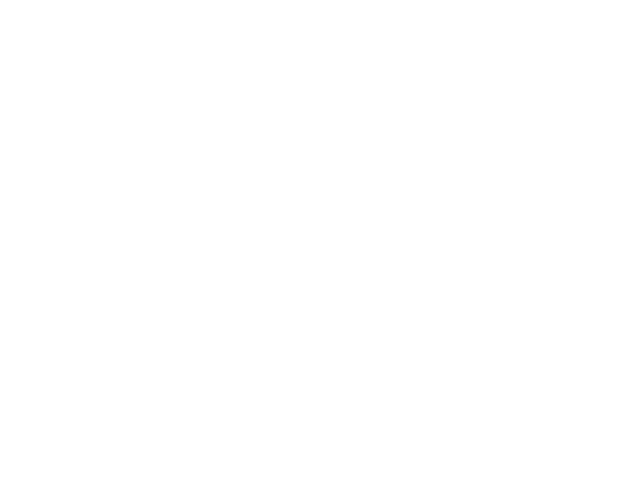

In [39]:
# Plot the ROC (Receiver Operating Characteristic) Curve
import matplotlib.pyplot as plt
%matplotlib nbagg
logreg_fpr, logreg_tpr, logreg_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(logreg_fpr, logreg_tpr, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [40]:
#  TASK 5B. Use k-Nearest Neighbors to predict the star rating for reviews in the testing set
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=11)
neighbor.fit(train_dtm, y_train)
y_pred_class = neighbor.predict(test_dtm)

print "----------------- Using k-Nearest Neighbors ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_class)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_class)

# Now calculate the AUC
y_pred_prob = neighbor.predict_proba(test_dtm)[:, 1]
knn_auc = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % knn_auc

----------------- Using k-Nearest Neighbors ----------------------

Accuracy of star rating prediction = 0.821917808219
Confusion Matrix
[[  6 177]
 [  5 834]]
ROC AUC Score = 0.735536059712


<IPython.core.display.Javascript object>


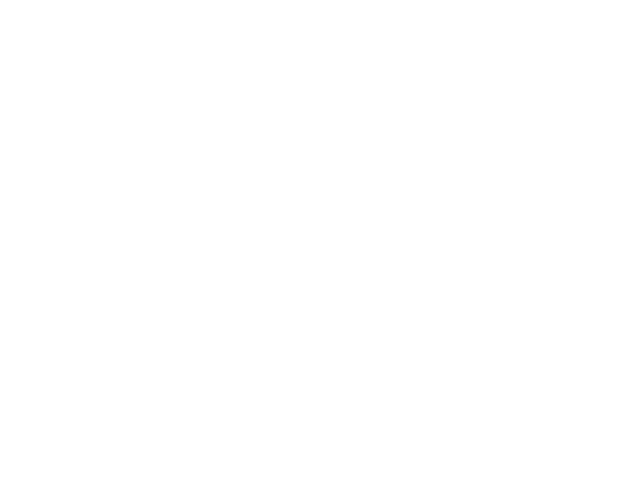

In [41]:
# Plot the ROC (Receiver Operating Characteristic) Curve
import matplotlib.pyplot as plt
%matplotlib nbagg
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(knn_fpr, knn_tpr, color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [42]:
#  TASK 5C. Use Classification Tree to predict the star rating for reviews in the testing set
from sklearn import tree
clt = tree.DecisionTreeClassifier()
clt.fit(train_dtm, y_train)
y_pred_class = clt.predict(test_dtm) 

print "----------------- Using Classification Tree ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_class)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_class)

# Now calculate the AUC
y_pred_prob=clt.predict_proba(test_dtm)[:, 1]
clt_auc = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % clt_auc

----------------- Using Classification Tree ----------------------

Accuracy of star rating prediction = 0.84637964775
Confusion Matrix
[[ 99  84]
 [ 73 766]]
ROC AUC Score = 0.726987631646


In [43]:
# Plot the ROC (Receiver Operating Characteristic) Curve
clt_fpr, clt_tpr, clt_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(clt_fpr, clt_tpr, color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

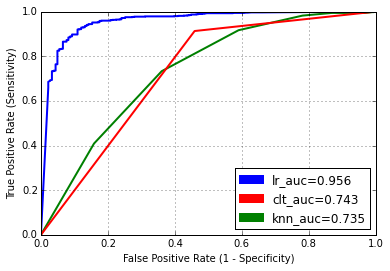

In [44]:
# Three ROC Curves in one plot

%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.plot(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, clt_fpr, clt_tpr,linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
blue_patch = mpatches.Patch(color='blue', label='lr_auc=0.956')  
red_patch= mpatches.Patch(color='red', label='clt_auc=0.743' )  
green_patch= mpatches.Patch(color='green', label='knn_auc=0.735')  
plt.legend(handles=[blue_patch, red_patch, green_patch], loc=4)
plt.grid(True)

In [45]:
# TASK 6. Add vote types (cool/useful/funny) as an additional features into the modeling process 
#         and refit the three models to predict the star rating in the testing set, and calculate 
#         the AUC and plot the ROC Curve for the three models. 
#         Any improvement or not? Comment on your findings.
print "-----------------------------------------------------------------------"
print "|              EXPERIMENT WITH cool, useful and funny                 |"
print "-----------------------------------------------------------------------"
print

-----------------------------------------------------------------------
|              EXPERIMENT WITH cool, useful and funny                 |
-----------------------------------------------------------------------



In [46]:
ydfCUF=ydf_51[['cool','useful','funny']]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ydfCUF, ydf_51.stars, random_state=1234567)
print X_train.shape
print X_test.shape

(3064, 3)
(1022, 3)


In [47]:
# TASK 6A. Use Logistic Regression to predict the star rating for reviews in the testing set

from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_train)
y_pred_rating=logreg.predict(X_test)

print "----------------- Using Logistic Regression ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_rating)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_rating)

# Now calculate the AUC using Logistic Regression 
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
logreg_auc2 = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % logreg_auc2

----------------- Using Logistic Regression ----------------------

Accuracy of star rating prediction = 0.834637964775
Confusion Matrix
[[ 24 159]
 [ 10 829]]
ROC AUC Score = 0.674433524167


<IPython.core.display.Javascript object>


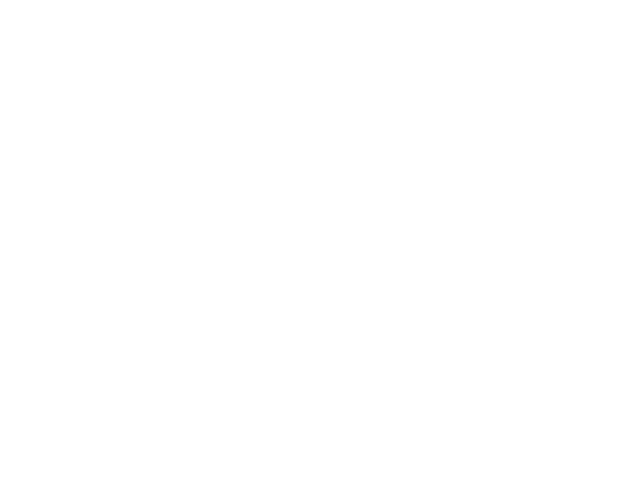

In [48]:
# Plot the ROC (Receiver Operating Characteristic) Curve
import matplotlib.pyplot as plt
%matplotlib nbagg
logreg_fpr, logreg_tpr, logreg_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(logreg_fpr, logreg_tpr, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [49]:
#  TASK 6B. Use k-Nearest Neighbors to predict the star rating for reviews in the testing set
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=11)
neighbor.fit(X_train, y_train)
y_pred_class = neighbor.predict(X_train)
y_pred_rating = neighbor.predict(X_test)
print "----------------- Using k-Nearest Neighbors ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_rating)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_rating)

# Now calculate the AUC
y_pred_prob = neighbor.predict_proba(X_test)[:, 1]
knn_auc2 = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % knn_auc2


----------------- Using k-Nearest Neighbors ----------------------

Accuracy of star rating prediction = 0.827788649706
Confusion Matrix
[[ 25 158]
 [ 18 821]]
ROC AUC Score = 0.651455349525


<IPython.core.display.Javascript object>


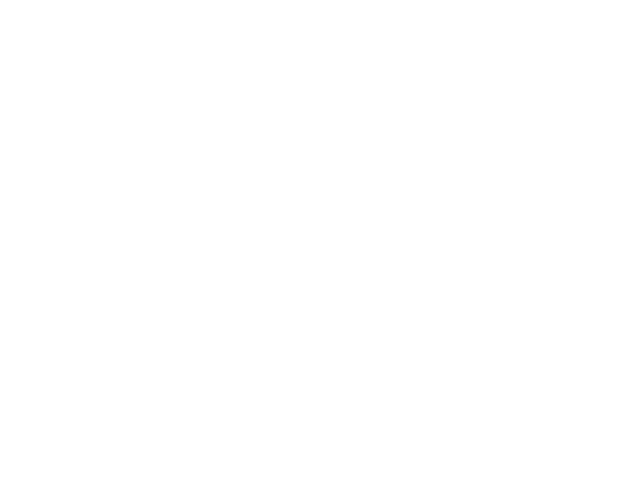

In [50]:
# Plot the ROC (Receiver Operating Characteristic) Curve
import matplotlib.pyplot as plt
%matplotlib nbagg
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(knn_fpr, knn_tpr, color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [51]:
#  TASK 6C. Use Classification Tree to predict the star rating for reviews in the testing set
from sklearn import tree
clt = tree.DecisionTreeClassifier()
clt.fit(X_train, y_train)
y_pred_class = clt.predict(X_train) 
y_pred_rating = clt.predict(X_test)
print "----------------- Using Classification Tree ----------------------"
print 
print "Accuracy of star rating prediction = %.40s" % metrics.accuracy_score(y_test, y_pred_rating)
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_rating)

# Now calculate the AUC
y_pred_prob=clt.predict_proba(X_test)[:, 1]
clt_auc2 = metrics.roc_auc_score(y_test_binary, y_pred_prob)
print "ROC AUC Score = %.40s" % clt_auc2

----------------- Using Classification Tree ----------------------

Accuracy of star rating prediction = 0.824853228963
Confusion Matrix
[[ 29 154]
 [ 25 814]]
ROC AUC Score = 0.620387919524


In [52]:
# Plot the ROC (Receiver Operating Characteristic) Curve
clt_fpr, clt_tpr, clt_thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(clt_fpr, clt_tpr, color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

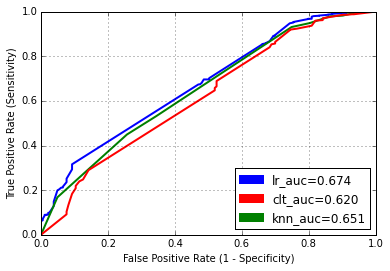

In [53]:
# Three ROC Curves in one plot

%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.plot(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, clt_fpr, clt_tpr,linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
blue_patch = mpatches.Patch(color='blue', label='lr_auc=0.674')  
red_patch= mpatches.Patch(color='red', label='clt_auc=0.620' )  
green_patch= mpatches.Patch(color='green', label='knn_auc=0.651')  
plt.legend(handles=[blue_patch, red_patch, green_patch], loc=4)
plt.grid(True)

In [54]:
all_aucs = [[logreg_auc, knn_auc, clt_auc], [logreg_auc2, knn_auc2, clt_auc2]]
auc_df = pd.DataFrame(all_aucs)
print auc_df

          0         1         2
0  0.956760  0.735536  0.726988
1  0.674434  0.651455  0.620388


In [55]:
auc_df.index = ['star-rating models', 'cool-useful-funny models']
auc_df.columns = ['logreg', 'knn', 'ctree']
print "Table Comparing AUCs"
print auc_df

Table Comparing AUCs
                            logreg       knn     ctree
star-rating models        0.956760  0.735536  0.726988
cool-useful-funny models  0.674434  0.651455  0.620388


In [56]:
print "Observations:"
print "  1. The AUC values for the 3 models with star-ratings using DTM are better "
print "     than the corresponding models with cool-useful-funny models."
print "  2. There is no improvement in model fit with the additional features."
print "  3. The Logistic Regression model with star-ratings using DTM seems to be "
print "     the best-fit model with maximum separability."


Observations:
  1. The AUC values for the 3 models with star-ratings using DTM are better 
     than the corresponding models with cool-useful-funny models.
  2. There is no improvement in model fit with the additional features.
  3. The Logistic Regression model with star-ratings using DTM seems to be 
     the best-fit model with maximum separability.
